In [58]:
import numpy as np
import pickle as pk
import matplotlib.pyplot as plt
import time
%matplotlib inline
%load_ext autoreload
%autoreload 2
import tensorflow as tf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [135]:
from dqltrainer import DQLagent

In [136]:
# import game,players,dominion,derivbot,combobot,cards,basic_ai,rl_agent

In [137]:
from game import *
from players import *
from dominion import *
from derivbot import *
from cards import *
from basic_ai import *
from rl_agent import *

## create a class object to do DQL

In [5]:
CARD_TO_INDEX

{Estate: 0, Duchy: 1, Province: 2, Copper: 3, Silver: 4, Gold: 5}

In [179]:
p1 = RandomPlayer()
p1.record_history = 1
p2 = RandomPlayer()
p2.record_history = 1
data = record_game(5000, [p1,p2],'data/5000random')

Playing game# 0
Playing game# 100
Playing game# 200
Playing game# 300
Playing game# 400
Playing game# 500
Playing game# 600
Playing game# 700
Playing game# 800
Playing game# 900
Playing game# 1000
Playing game# 1100
Playing game# 1200
Playing game# 1300
Playing game# 1400
Playing game# 1500
Playing game# 1600
Playing game# 1700
Playing game# 1800
Playing game# 1900
Playing game# 2000
Playing game# 2100
Playing game# 2200
Playing game# 2300
Playing game# 2400
Playing game# 2500
Playing game# 2600
Playing game# 2700
Playing game# 2800
Playing game# 2900
Playing game# 3000
Playing game# 3100
Playing game# 3200
Playing game# 3300
Playing game# 3400
Playing game# 3500
Playing game# 3600
Playing game# 3700
Playing game# 3800
Playing game# 3900
Playing game# 4000
Playing game# 4100
Playing game# 4200
Playing game# 4300
Playing game# 4400
Playing game# 4500
Playing game# 4600
Playing game# 4700
Playing game# 4800
Playing game# 4900
Took 210.949 seconds


In [46]:
s,a,r,n = data
allact = np.identity(a.shape[1])

In [160]:
dql = DQLagent(length=(data[0].shape[1]+data[1].shape[1]))

In [183]:
for i in range(10):
    print(i)
    dql.mtrain=500
    dql.target_iterations=30
    dql.predic_iterations=100
    dql.do_target_iteration(data0)
    vf = lambda x: dql.model_predict.predict(x)
    p1 = RLPlayer(vf, 0)
    p2 = RandomPlayer()
    print(compare_bots([p1, p2],20))

0
start target model iteration 0
start target model iteration 1
start target model iteration 2
start target model iteration 3
start target model iteration 4
start target model iteration 5
start target model iteration 6
start target model iteration 7
start target model iteration 8
start target model iteration 9
start target model iteration 10
start target model iteration 11
start target model iteration 12
start target model iteration 13
start target model iteration 14
start target model iteration 15
start target model iteration 16
start target model iteration 17
start target model iteration 18
start target model iteration 19
start target model iteration 20
start target model iteration 21
start target model iteration 22
start target model iteration 23
start target model iteration 24
start target model iteration 25
start target model iteration 26
start target model iteration 27
start target model iteration 28
start target model iteration 29
Took 2.304 seconds
{<Player: RLPlayer>: 0, <Play

start target model iteration 1
start target model iteration 2
start target model iteration 3
start target model iteration 4
start target model iteration 5
start target model iteration 6
start target model iteration 7
start target model iteration 8
start target model iteration 9
start target model iteration 10
start target model iteration 11
start target model iteration 12
start target model iteration 13
start target model iteration 14
start target model iteration 15
start target model iteration 16
start target model iteration 17
start target model iteration 18
start target model iteration 19
start target model iteration 20
start target model iteration 21
start target model iteration 22
start target model iteration 23
start target model iteration 24
start target model iteration 25
start target model iteration 26
start target model iteration 27
start target model iteration 28
start target model iteration 29
Took 2.043 seconds
{<Player: RLPlayer>: 0, <Player: RandomPlayer>: 20}
9
start ta

In [143]:
dql.mtrain = 1000
test = dql.draw_sample(data)
s,a,r,n = test
sa = np.concatenate([s,a],axis=1)

In [188]:
dql.model_predict.save_weights('./model/temp')


Consider using a TensorFlow optimizer from `tf.train`.



Consider using a TensorFlow optimizer from `tf.train`.


In [189]:
dql.model_predict.load_weights('./model/temp')

In [169]:
dql.model_predict.predict(sa) 

array([[  5.973842 ],
       [ 48.460007 ],
       [  6.8140507],
       [  9.323796 ],
       [  7.277007 ],
       [130.62773  ],
       [103.64347  ],
       [  7.6318674],
       [  6.827512 ],
       [  5.3099623],
       [  5.4069285],
       [  6.937272 ],
       [  6.672025 ],
       [  7.8606734],
       [273.53214  ],
       [  6.49632  ],
       [ 12.074041 ],
       [  6.481762 ],
       [  8.749875 ],
       [135.3217   ],
       [ 29.89573  ],
       [145.61523  ],
       [ 41.399887 ],
       [  5.0051193],
       [  7.9146366],
       [ 47.905556 ],
       [  7.6721945],
       [  8.807971 ],
       [  9.736318 ],
       [  9.315252 ],
       [338.11377  ],
       [  6.0134463],
       [ 70.035706 ],
       [  4.756662 ],
       [ 13.499564 ],
       [  7.130609 ],
       [  7.1593513],
       [ 15.916928 ],
       [  6.3621407],
       [  7.491189 ],
       [  8.1720915],
       [  7.7814016],
       [ 25.938786 ],
       [ 12.397821 ],
       [  9.231531 ],
       [  

In [148]:
dql.model_target.predict(sa) 

array([[ 44.25826  ],
       [ 56.362705 ],
       [ 31.635338 ],
       [ 33.028034 ],
       [ 25.579624 ],
       [ 48.044487 ],
       [-17.43165  ],
       [ 27.873678 ],
       [ 30.801235 ],
       [ 35.30589  ],
       [ 41.902832 ],
       [ 29.43296  ],
       [ 30.419739 ],
       [ 24.380863 ],
       [257.27057  ],
       [ 39.950066 ],
       [ 40.042572 ],
       [ 36.83612  ],
       [ 37.632885 ],
       [ 68.435005 ],
       [ 40.60194  ],
       [ 76.118484 ],
       [ 43.577736 ],
       [ 40.18558  ],
       [ 25.172548 ],
       [ 53.431644 ],
       [ 29.72214  ],
       [ 25.060017 ],
       [ 29.724728 ],
       [ 45.989426 ],
       [340.67664  ],
       [ 34.193428 ],
       [ 43.32557  ],
       [ 40.560047 ],
       [ 53.594868 ],
       [ 22.875898 ],
       [ 39.2794   ],
       [ 48.19452  ],
       [ 34.838688 ],
       [ 24.993053 ],
       [ 24.71975  ],
       [ 24.628435 ],
       [ 49.593452 ],
       [ 50.020653 ],
       [ 33.942665 ],
       [ 3

In [170]:
dql.compute_target(test)

array([[  5.53444195],
       [ 48.87781906],
       [  7.13334751],
       [  9.91459751],
       [  7.46663666],
       [147.72640991],
       [107.94689941],
       [  7.57378721],
       [  6.95587254],
       [  5.27851868],
       [  5.51832342],
       [  7.18540144],
       [  6.8620162 ],
       [  7.67574692],
       [267.83364868],
       [  6.02640247],
       [ 11.8176527 ],
       [  6.49273825],
       [  9.76023245],
       [137.07067871],
       [ 34.79987335],
       [141.56114197],
       [ 47.82834244],
       [  4.56317472],
       [  7.8177371 ],
       [ 45.08970261],
       [  7.30554581],
       [  8.75451899],
       [ 10.31446171],
       [ 10.67348862],
       [292.956604  ],
       [  6.54566336],
       [ 74.5426712 ],
       [  4.99453306],
       [ 15.05854702],
       [  7.0985527 ],
       [  7.45872593],
       [ 15.92346096],
       [  6.75456333],
       [  7.38522863],
       [  7.92776728],
       [  7.80476713],
       [ 25.32969284],
       [ 11

In [193]:
p1 = SmithyBot()
p1.record_history = 1
p2 = RandomPlayer()
p2.record_history = 1
data = record_game(2000, [p1,p2])

Playing game# 0
Playing game# 100
Playing game# 200
Playing game# 300
Playing game# 400
Playing game# 500
Playing game# 600
Playing game# 700
Playing game# 800
Playing game# 900
Playing game# 1000
Playing game# 1100
Playing game# 1200
Playing game# 1300
Playing game# 1400
Playing game# 1500
Playing game# 1600
Playing game# 1700
Playing game# 1800
Playing game# 1900
Took 34.795 seconds


In [ ]:
for i in range(10):
    print(i)
    dql.mtrain=500
    dql.target_iterations=30
    dql.predic_iterations=100
    dql.do_target_iteration(data0)
    vf = lambda x: dql.model_predict.predict(x)
    p1 = RLPlayer(vf, 0)
    p2 = RandomPlayer()
    print(compare_bots([p1, p2],20))

0
start target model iteration 0
start target model iteration 1
start target model iteration 2
start target model iteration 3
start target model iteration 4
start target model iteration 5
start target model iteration 6
start target model iteration 7
start target model iteration 8
start target model iteration 9
start target model iteration 10
start target model iteration 11


In [28]:
data

(array([[0, 8, 8, ..., 0, 0, 0],
        [0, 8, 8, ..., 0, 0, 0],
        [0, 8, 8, ..., 0, 0, 0],
        ...,
        [0, 0, 7, ..., 0, 0, 3],
        [0, 0, 7, ..., 0, 0, 3],
        [0, 0, 7, ..., 0, 0, 3]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]), array([[0, 8, 8, ..., 0, 0, 0],
        [0, 8, 8, ..., 0, 0, 0],
        [0, 8, 8, ..., 0, 0, 0],
        ...,
        [0, 0, 7, ..., 0, 0, 3],
        [0, 0, 7, ..., 0, 0, 3],
        [0, 0, 7, ..., 0, 0, 3]]))

In [25]:
vf = lambda x: 0
p1 = RandomPlayer()
vf = lambda x: dql.model_predict.predict(x)
p2 = RLPlayer(vf)
compare_bots([p1, p2], 10)

{<Player: RandomPlayer>: 10, <Player: RLPlayer>: 0}

In [19]:
sa[0,:].shape

(129,)

In [27]:
s,a,r,n = data
sa = np.concatenate([s,a],axis=1)
dql.model_predict(sa[0,:].reshape([1,-1]))[0]

<tf.Tensor: id=14012, shape=(1,), dtype=float32, numpy=array([0.9918932], dtype=float32)>

In [8]:
vf = lambda x: 0
p1 = RLPlayer(vf)
p1.record_history = 1
p2 = RLPlayer(vf)
p2.record_history = 1
data = record_game(1, [p1,p2])


Playing game# 0
Took 0.784 seconds


In [206]:
model_predict = tf.keras.models.Sequential([
  tf.keras.layers.Dense(129, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(129, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(30, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model_predict.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])
model_target = model_predict

In [234]:
def compute_target(model, n, r):
    """
    compute_target use the target network to predict the Q value
    n is the next state
    with a Q(s,a) model
    compute r + gamma*max_a' Q(s',a')
    It outputs the target that the deep neural network wants to fit for.
    shape of action is 18
    """
    allact = np.identity(18)
    # array of (18, number of samples, state action pair)
    tmp = np.array([model.predict(np.concatenate([n, np.tile(act, [n.shape[0],1])],axis=1)) for act in allact])
    # maximum q(s',a')
    qn = np.max(tmp, axis=0)
    return qn + r.reshape([-1,1])

In [237]:
def fit_target(model_predict, model_target, data, epochs):
    """
    fit_target_network
    computes the target network prediction and fit for it with prediction network
    """
    # state, action, reward, next state
    s,a,r,n = data
    sa = np.concatenate([s,a],axis=1)
    target = compute_target(model_target, n,r)
    model_predict.fit(sa, target, epochs=epochs, verbose = 0)
    return model_predict

In [238]:
def draw_sample(data, mtrain=500):
    """
    draw random samples from the full dataset generated
    """
    m = data[1].shape[0]
    select = np.random.choice(m,mtrain,replace=False)
    return tuple([d[select,:] for d in data])
    

In [ ]:
def do_target_iteration(model_predict, model_target, data, epochs, target_iterations, ):
    

In [233]:
target_iterations = 10
predict_iterations = 10
for j in range(target_iterations):
    print('start target model iteration {:d}'.format(j))
    model_target = model_predict
    for i in range(predict_iterations):
        model_predict = fit_target_network(model_predict, model_target, draw_sample(data), 10)

start target model iteration 0
Train on 500 samples
Epoch 1/10
500/500 [==============================] - 0s 71us/sample - loss: 81.3340 - mean_squared_error: 81.3340
Epoch 2/10
500/500 [==============================] - 0s 60us/sample - loss: 81.3340 - mean_squared_error: 81.3340
Epoch 3/10
500/500 [==============================] - 0s 67us/sample - loss: 81.3340 - mean_squared_error: 81.3340
Epoch 4/10
500/500 [==============================] - 0s 69us/sample - loss: 81.3340 - mean_squared_error: 81.3340
Epoch 5/10
500/500 [==============================] - 0s 66us/sample - loss: 81.3340 - mean_squared_error: 81.3340
Epoch 6/10
500/500 [==============================] - 0s 66us/sample - loss: 81.3340 - mean_squared_error: 81.3340
Epoch 7/10
500/500 [==============================] - 0s 65us/sample - loss: 81.3340 - mean_squared_error: 81.3340
Epoch 8/10
500/500 [==============================] - 0s 66us/sample - loss: 81.3340 - mean_squared_error: 81.3340
Epoch 9/10
500/500 [========

500/500 [==============================] - 0s 61us/sample - loss: 40.1860 - mean_squared_error: 40.1860
Epoch 10/10
500/500 [==============================] - 0s 70us/sample - loss: 40.1860 - mean_squared_error: 40.1860
Train on 500 samples
Epoch 1/10
500/500 [==============================] - 0s 76us/sample - loss: 99.5500 - mean_squared_error: 99.5500
Epoch 2/10
500/500 [==============================] - 0s 61us/sample - loss: 99.5500 - mean_squared_error: 99.5500
Epoch 3/10
500/500 [==============================] - 0s 63us/sample - loss: 99.5500 - mean_squared_error: 99.5500
Epoch 4/10
500/500 [==============================] - 0s 59us/sample - loss: 99.5500 - mean_squared_error: 99.5500
Epoch 5/10
500/500 [==============================] - 0s 63us/sample - loss: 99.5500 - mean_squared_error: 99.5500
Epoch 6/10
500/500 [==============================] - 0s 64us/sample - loss: 99.5500 - mean_squared_error: 99.5500
Epoch 7/10
500/500 [==============================] - 0s 64us/sample 

Epoch 8/10
500/500 [==============================] - 0s 64us/sample - loss: 100.3980 - mean_squared_error: 100.3980
Epoch 9/10
500/500 [==============================] - 0s 63us/sample - loss: 100.3980 - mean_squared_error: 100.3980
Epoch 10/10
500/500 [==============================] - 0s 64us/sample - loss: 100.3980 - mean_squared_error: 100.3980
Train on 500 samples
Epoch 1/10
500/500 [==============================] - 0s 74us/sample - loss: 121.2120 - mean_squared_error: 121.2120
Epoch 2/10
500/500 [==============================] - 0s 72us/sample - loss: 121.2120 - mean_squared_error: 121.2120
Epoch 3/10
500/500 [==============================] - 0s 63us/sample - loss: 121.2120 - mean_squared_error: 121.2120
Epoch 4/10
500/500 [==============================] - 0s 66us/sample - loss: 121.2120 - mean_squared_error: 121.2120
Epoch 5/10
500/500 [==============================] - 0s 64us/sample - loss: 121.2120 - mean_squared_error: 121.2120
Epoch 6/10
500/500 [======================

500/500 [==============================] - 0s 63us/sample - loss: 60.0100 - mean_squared_error: 60.0100
Epoch 7/10
500/500 [==============================] - 0s 68us/sample - loss: 60.0100 - mean_squared_error: 60.0100
Epoch 8/10
500/500 [==============================] - 0s 64us/sample - loss: 60.0100 - mean_squared_error: 60.0100
Epoch 9/10
500/500 [==============================] - 0s 64us/sample - loss: 60.0100 - mean_squared_error: 60.0100
Epoch 10/10
500/500 [==============================] - 0s 64us/sample - loss: 60.0100 - mean_squared_error: 60.0100
Train on 500 samples
Epoch 1/10
500/500 [==============================] - 0s 69us/sample - loss: 100.4080 - mean_squared_error: 100.4080
Epoch 2/10
500/500 [==============================] - 0s 59us/sample - loss: 100.4080 - mean_squared_error: 100.4080
Epoch 3/10
500/500 [==============================] - 0s 60us/sample - loss: 100.4080 - mean_squared_error: 100.4080
Epoch 4/10
500/500 [==============================] - 0s 58us/s

500/500 [==============================] - 0s 61us/sample - loss: 80.2920 - mean_squared_error: 80.2920
Epoch 5/10
500/500 [==============================] - 0s 64us/sample - loss: 80.2920 - mean_squared_error: 80.2920
Epoch 6/10
500/500 [==============================] - 0s 61us/sample - loss: 80.2920 - mean_squared_error: 80.2920
Epoch 7/10
500/500 [==============================] - 0s 63us/sample - loss: 80.2920 - mean_squared_error: 80.2920
Epoch 8/10
500/500 [==============================] - 0s 61us/sample - loss: 80.2920 - mean_squared_error: 80.2920
Epoch 9/10
500/500 [==============================] - 0s 61us/sample - loss: 80.2920 - mean_squared_error: 80.2920
Epoch 10/10
500/500 [==============================] - 0s 62us/sample - loss: 80.2920 - mean_squared_error: 80.2920
Train on 500 samples
Epoch 1/10
500/500 [==============================] - 0s 71us/sample - loss: 20.4260 - mean_squared_error: 20.4260
Epoch 2/10
500/500 [==============================] - 0s 59us/sample 

500/500 [==============================] - 0s 53us/sample - loss: 139.7600 - mean_squared_error: 139.7600
Epoch 3/10
500/500 [==============================] - 0s 57us/sample - loss: 139.7600 - mean_squared_error: 139.7600
Epoch 4/10
500/500 [==============================] - 0s 56us/sample - loss: 139.7600 - mean_squared_error: 139.7600
Epoch 5/10
500/500 [==============================] - 0s 55us/sample - loss: 139.7600 - mean_squared_error: 139.7600
Epoch 6/10
500/500 [==============================] - 0s 58us/sample - loss: 139.7600 - mean_squared_error: 139.7600
Epoch 7/10
500/500 [==============================] - 0s 54us/sample - loss: 139.7600 - mean_squared_error: 139.7600
Epoch 8/10
500/500 [==============================] - 0s 58us/sample - loss: 139.7600 - mean_squared_error: 139.7600
Epoch 9/10
500/500 [==============================] - 0s 64us/sample - loss: 139.7600 - mean_squared_error: 139.7600
Epoch 10/10
500/500 [==============================] - 0s 61us/sample - los

500/500 [==============================] - 0s 58us/sample - loss: 60.4760 - mean_squared_error: 60.4760
Train on 500 samples
Epoch 1/10
500/500 [==============================] - 0s 65us/sample - loss: 80.1220 - mean_squared_error: 80.1220
Epoch 2/10
500/500 [==============================] - 0s 52us/sample - loss: 80.1220 - mean_squared_error: 80.1220
Epoch 3/10
500/500 [==============================] - 0s 59us/sample - loss: 80.1220 - mean_squared_error: 80.1220
Epoch 4/10
500/500 [==============================] - 0s 56us/sample - loss: 80.1220 - mean_squared_error: 80.1220
Epoch 5/10
500/500 [==============================] - 0s 59us/sample - loss: 80.1220 - mean_squared_error: 80.1220
Epoch 6/10
500/500 [==============================] - 0s 55us/sample - loss: 80.1220 - mean_squared_error: 80.1220
Epoch 7/10
500/500 [==============================] - 0s 56us/sample - loss: 80.1220 - mean_squared_error: 80.1220
Epoch 8/10
500/500 [==============================] - 0s 56us/sample -

500/500 [==============================] - 0s 60us/sample - loss: 20.4120 - mean_squared_error: 20.4120
Epoch 9/10
500/500 [==============================] - 0s 66us/sample - loss: 20.4120 - mean_squared_error: 20.4120
Epoch 10/10
500/500 [==============================] - 0s 60us/sample - loss: 20.4120 - mean_squared_error: 20.4120
start target model iteration 9
Train on 500 samples
Epoch 1/10
500/500 [==============================] - 0s 69us/sample - loss: 40.6920 - mean_squared_error: 40.6920
Epoch 2/10
500/500 [==============================] - 0s 56us/sample - loss: 40.6920 - mean_squared_error: 40.6920
Epoch 3/10
500/500 [==============================] - 0s 61us/sample - loss: 40.6920 - mean_squared_error: 40.6920
Epoch 4/10
500/500 [==============================] - 0s 58us/sample - loss: 40.6920 - mean_squared_error: 40.6920
Epoch 5/10
500/500 [==============================] - 0s 62us/sample - loss: 40.6920 - mean_squared_error: 40.6920
Epoch 6/10
500/500 [==================

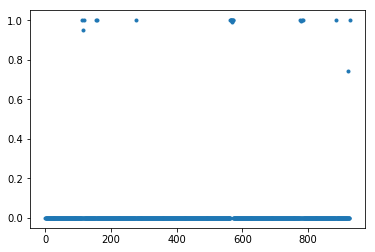

In [ ]:
def actor_critic(iterations=10, epochs=50, games=10):
    model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(111, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(111, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(30, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['mean_squared_error'])
    for i in range(iterations):
        print("----------------------------")
        print("|    Iteration #%03d        |" % (i + 1))
        print("----------------------------")
        p1 = rl_agent.RandomPlayer()
        vf = lambda x: model.predict(x).flatten()[0]
        p2 = rl_agent.RLPlayer(vf)
        X, Y = dominion.record_game(games, [p1,p2])
        model.fit(X, Y, epochs=epochs)
        print(dominion.compare_bots([p1, p2], 10))
    return model

# run games of random bot vs. smithy bot

In [25]:
st = time.time()
s = []
for i in xrange(1000):
    p1 = smithyComboBotFactory()
    vf = lambda x: 0
    p2 = RLPlayer(vf)
    s_this = run([p1,p2])
    s.append(s_this)
print time.time() - st

55.9562759399


'winrate of chapel bot over smithy bot is 0.0 %'

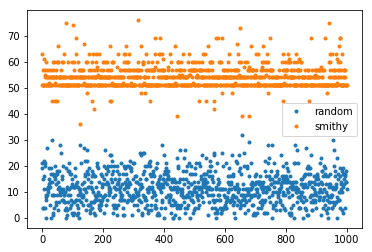

In [27]:
rl=[]
smithy=[]
for s_this in s:
    if isinstance(s_this[0][0], RLPlayer):
        rl.append(s_this[0][1])
        smithy.append(s_this[1][1])
    else:
        rl.append(s_this[1][1])
        smithy.append(s_this[0][1])

rl = np.array(rl)
smithy = np.array(smithy)
plt.plot(rl,'.')
plt.plot(smithy,'.')
plt.legend(['random','smithy'])
'winrate of chapel bot over smithy bot is {:.01f} %'.format(sum(rl-smithy>0)*100./len(rl))

# games of smithy vs. chapel bot

In [30]:
st = time.time()
s = []
for i in xrange(1000):
    p1 = smithyComboBotFactory()
    p2 = chapelComboBot
    s_this = run([p1,p2])
    s.append(s_this)
print time.time() - st

15.8718259335


'winrate of chapel bot over smithy bot is 25.2 %'

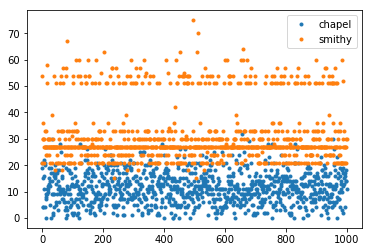

In [31]:
chapel=[]
smithy=[]
for s_this in s:
    if s_this[0][0].name == 'chapelComboBot':
        chapel.append(s_this[0][1])
        smithy.append(s_this[1][1])
    else:
        chapel.append(s_this[1][1])
        smithy.append(s_this[0][1])

chapel = np.array(chapel)
smithy = np.array(smithy)
plt.plot(rl,'.')
plt.plot(smithy,'.')
plt.legend(['chapel','smithy'])
'winrate of chapel bot over smithy bot is {:.01f} %'.format(sum(chapel-smithy>0)/1000.*100)

## random vs. chapel bot

In [33]:
st = time.time()
s = []
for i in xrange(100):
    p1 = chapelComboBot
    vf = lambda x: 0
    p2 = RLPlayer(vf)
    s_this = run([p1,p2])
    s.append(s_this)
print time.time() - st

8.80713677406


'winrate of random bot over chapel bot is 1.2 %'

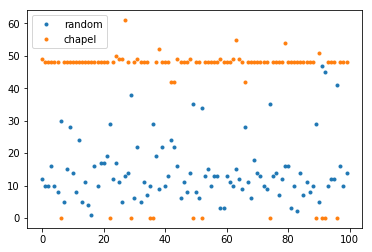

In [34]:
rl=[]
smithy=[]
for s_this in s:
    if isinstance(s_this[0][0], RLPlayer):
        rl.append(s_this[0][1])
        smithy.append(s_this[1][1])
    else:
        rl.append(s_this[1][1])
        smithy.append(s_this[0][1])

rl = np.array(rl)
smithy = np.array(smithy)
plt.plot(rl,'.')
plt.plot(smithy,'.')
plt.legend(['random','chapel'])
'winrate of random bot over chapel bot is {:.01f} %'.format(sum(rl-smithy>0)/1000.*100)

## run a test game

In [16]:
p1=smithyComboBotFactory()
p1.name = '1'
p2=smithyComboBotFactory()
g = Game.setup([p1, p2])

In [17]:
while not g.over():
    g = g.take_turn()

In [18]:
g.playerstates[0].player.name

'1'

In [77]:
p1=smithyComboBotFactory()
p2=smithyComboBotFactory()
s = run([p1, p2])

In [78]:
scores_to_data(s)

(array([[0, 8, 8, ..., 0, 0, 0],
        [0, 8, 8, ..., 0, 0, 0],
        [0, 8, 8, ..., 0, 0, 0],
        ...,
        [0, 8, 8, ..., 0, 0, 0],
        [0, 8, 8, ..., 0, 0, 0],
        [0, 8, 8, ..., 0, 0, 0]]),
 array([15, 16, 17, 18, 19, 21, 23, 18, 19, 21, 23, 25, 21, 23, 18, 19, 20,
        15, 16,  3,  4,  5,  6,  7,  8,  9, 10,  5,  6,  0,  0,  0,  0, -1,
        -2, -3, -4]))

# use simple fitting algorithm for value function

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [14]:
p1 = smithyComboBotFactory()
p2 = smithyComboBotFactory()
[X,Y] = record_game(100,[p1,p2],[True, False])

Playing game# 0
Took 1.049 seconds


In [71]:
reg_this = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=300)
reg_this.fit(X, Y)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=300,
         random_state=None)

In [72]:
np.std(Y)

7.462169848909707

In [75]:
np.std(reg_this.predict(X))

2.9179620901036536

In [76]:
np.std(reg_this.predict(X)-Y)

6.714506674024179

In [64]:
nepoch = 50
Xlist=[]
Ylist=[]
reglist=[]
reg_this = regr_2
for i in range(nepoch):
    print('epoch number {:d}'.format(i))
    [xtmp, ytmp] = dominion.record_game(50, lambda x: reg_this.predict(x)[0])
    Xlist.append(xtmp)
    Ylist.append(ytmp)
    reg_this = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=50)
    reg_this.fit(xtmp, ytmp)
    reglist.append(reg_this)

epoch number 0
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 48.654 seconds
epoch number 1
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 46.211 seconds
epoch number 2
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 47.198 seconds
epoch number 3
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 95.950 seconds
epoch number 4
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 134.172 seconds
epoch number 5
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 69.596 seconds
epoch number 6
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 82.834 seconds
epoch number 7
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 103.316 seconds
epoch number 8
Playing game# 0
Playing game# 1

KeyboardInterrupt: 

In [69]:
np.concatenate(Xlist).shape

(524447, 111)

In [70]:
reg_this = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=50)
reg_this.fit(np.concatenate(Xlist), np.concatenate(Ylist))

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None)

In [71]:
st = time.time()
s = []
for i in xrange(50):
    if not i%10:
        print('game {:d}'.format(i))
    p1 = rl_agent.RLPlayer(lambda x: 0)
    p1.name = 'randombot'
    vf = lambda x: reg_this.predict(x)[0]
    p2 = rl_agent.RLPlayer(vf)
    s_this = dominion.run([p1,p2])
    s.append(s_this)
print time.time() - st

game 0
game 10
game 20
game 30
game 40
44.5003659725


In [72]:
rl=[]
ran=[]
for s_this in s:
    if s_this[0][0].name == 'randombot':
        ran.append(s_this[0][1])
        rl.append(s_this[1][1])
    else:
        ran.append(s_this[1][1])
        rl.append(s_this[0][1])

rl = np.array(rl)
ran = np.array(ran)

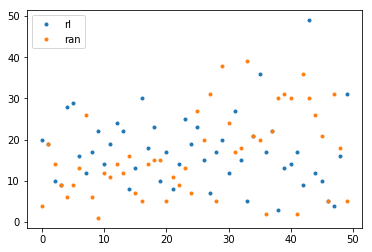

In [73]:
plt.plot(rl,'.')
plt.plot(ran,'.')
plt.legend(['rl','ran'])

In [74]:
'winrate of rl bot over random bot is {:.01f} %'.format(sum(rl-ran>0)/float(len(rl))*100)

'winrate of rl bot over random bot is 50.0 %'

In [55]:
nepoch = 10
thresh = 100000
X=np.concatenate(Xlist)
Y=np.concatenate(Ylist)
reg_this = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=50)
reg_this.fit(np.concatenate(Xlist), np.concatenate(Ylist))
for i in range(nepoch):
    print('epoch number {:d}'.format(i))
    [xtmp, ytmp] = dominion.record_game(50, lambda x: reg_this.predict(x)[0])
    X = np.concatenate([X, xtmp])
    Y = np.concatenate([Y, ytmp])
    reg_this = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=50)
    if len(Y)>thresh:
        reg_this.fit(X[-thresh:,:], Y[-thresh:])
    else:
        reg_this.fit(X, Y)
    reglist.append(reg_this)

epoch number 0
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 107.413 seconds
epoch number 1
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 100.908 seconds
epoch number 2
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 119.176 seconds
epoch number 3
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 111.700 seconds
epoch number 4
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 51.191 seconds
epoch number 5
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 105.833 seconds
epoch number 6
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 82.883 seconds
epoch number 7
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 88.979 seconds
epoch number 8
Playing game# 0
Playing game

### evaluate winrate against random bot

In [58]:
reg_this = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=50)
reg_this.fit(X, Y)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None)

In [23]:
st = time.time()
s = []
for i in xrange(50):
    if not i%10:
        print('game {:d}'.format(i))
    p1 = RLPlayer(lambda x: 0)
    p1.name = 'randombot'
    vf = lambda x: regr_2.predict(x)[0]
    p2 = RLPlayer(vf)
    s_this = run([p1,p2])
    s.append(s_this)
print time.time() - st
rl=[]
ran=[]
for s_this in s:
    if s_this[0][0].name == 'randombot':
        ran.append(s_this[0][1])
        rl.append(s_this[1][1])
    else:
        ran.append(s_this[1][1])
        rl.append(s_this[0][1])
rl = np.array(rl)
ran = np.array(ran)
print('winrate of rl bot over random bot is {:.01f} %'.format(sum(rl-ran>0)/float(len(rl))*100))

game 0
game 10
game 20
game 30
game 40
40.3798801899
winrate of rl bot over random bot is 24.0 %


In [ ]:
nepoch = 10
thresh = 100000
reglist=[]
for i in range(nepoch):
    print('epoch number {:d}'.format(i))
    [xtmp, ytmp] = dominion.record_game(50, lambda x: reg_this.predict(x)[0])
    X = np.concatenate([X, xtmp])
    Y = np.concatenate([Y, ytmp])
    reg_this = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=50)
    if len(Y)>thresh:
        reg_this.fit(X[-thresh:,:], Y[-thresh])
    else:
        reg_this.fit(X[-thresh:,:], Y[-thresh])
    reglist.append(reg_this)